## Introduction

Cardiovascular diseases (CVDs) are a major health concern worldwide. Early and accurate prediction of heart disease can significantly improve patient outcomes. This challenge aims at developing machine learning models that predict the likelihood of heart disease using clinical and demographic data.

## Libraries and Data Loading

In [188]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

In [189]:
#import a raw csv file from a github link

import pandas as pd
url = 'https://raw.githubusercontent.com/Josh-robins/SPARK_AI_Medical_Imgaing_Class/refs/heads/main/week5/train.csv'

df = pd.read_csv(url)

print(df.head())

      id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  83327  18995       2     162    83.0    120     80            1     1   
1  86196  17319       1     158    64.0    120     80            1     1   
2  59158  19017       1     165    95.0    160    100            2     1   
3  16399  20388       1     164    83.0    150    100            1     1   
4  29470  18236       1     156    52.0    100     67            1     1   

   smoke  alco  active  cardio  
0      0     0       0       1  
1      0     0       1       0  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       0       0  


## Exploratory Data Analysis (EDA)

In [190]:
#get the number of rows and number of columns
df.shape

(56000, 13)

In [191]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id           age        gender        height        weight  \
count  56000.000000  56000.000000  56000.000000  56000.000000  56000.000000   
mean   49997.024982  19466.634446      1.349107    164.344089     74.222059   
std    28874.261935   2461.793196      0.476692      8.226979     14.389746   
min        0.000000  10859.000000      1.000000     57.000000     11.000000   
25%    24993.750000  17669.500000      1.000000    159.000000     65.000000   
50%    50001.500000  19698.000000      1.000000    165.000000     72.000000   
75%    74949.500000  21321.000000      2.000000    170.000000     82.000000   
max    99999.000000  23692.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  56000.000000  56000.000000  56000.000000  56000.000000  56000.000000   
mean     129.041732     96.798196      1.366750      1.226679      0.087839   
std      161.551930    193.567

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56000 non-null  int64  
 1   age          56000 non-null  int64  
 2   gender       56000 non-null  int64  
 3   height       56000 non-null  int64  
 4   weight       56000 non-null  float64
 5   ap_hi        56000 non-null  int64  
 6   ap_lo        56000 non-null  int64  
 7   cholesterol  56000 non-null  int64  
 8   gluc         56000 non-null  int64  
 9   smoke        56000 non-null  int64  
 10  alco         56000 non-null  int64  
 11  active       56000 non-null  int64  
 12  cardio       56000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.6 MB


In [193]:

# Replace negative values in 'ap_lo' and 'ap_hi' with their absolute values
df['ap_lo'] = df['ap_lo'].abs()
df['ap_hi'] = df['ap_hi'].abs()


In [194]:
# replace outliers in ap_lo and ap_hi with mean with their respective means

# Calculate the mean of 'ap_lo' and 'ap_hi'
mean_ap_lo = df['ap_lo'].mean()
mean_ap_hi = df['ap_hi'].mean()

# Define the upper and lower bounds for outliers (adjust as needed)
ap_lo_upper_bound = df['ap_lo'].quantile(0.99)
ap_lo_lower_bound = df['ap_lo'].quantile(0.01)
ap_hi_upper_bound = df['ap_hi'].quantile(0.99)
ap_hi_lower_bound = df['ap_hi'].quantile(0.01)

# Replace outliers with the mean in 'ap_lo'
df.loc[(df['ap_lo'] > ap_lo_upper_bound) | (df['ap_lo'] < ap_lo_lower_bound), 'ap_lo'] = mean_ap_lo

# Replace outliers with the mean in 'ap_hi'
df.loc[(df['ap_hi'] > ap_hi_upper_bound) | (df['ap_hi'] < ap_hi_lower_bound), 'ap_hi'] = mean_ap_hi
# Ensure values remain as integers
df['ap_lo'] = df['ap_lo'].astype(int)
df['ap_hi'] = df['ap_hi'].astype(int)


In [195]:
df['ap_lo'].mean()

np.float64(90.54748214285715)

In [196]:
# replace outliers in ap-lo with mean

# Calculate the mean of 'ap_lo'
mean_ap_lo = df['ap_lo'].mean()

# Define the upper and lower bounds for outliers (adjust as needed)
ap_lo_upper_bound = df['ap_lo'].quantile(0.99)
ap_lo_lower_bound = df['ap_lo'].quantile(0.01)

# Replace outliers with the mean in 'ap_lo'
df.loc[(df['ap_lo'] > ap_lo_upper_bound) | (df['ap_lo'] < ap_lo_lower_bound), 'ap_lo'] = mean_ap_lo

# values should remain as integers remain as integers
df['ap_lo'] = df['ap_lo'].astype(int)

In [197]:
df['ap_lo'].mean()

np.float64(81.58735714285714)

In [198]:
df['ap_lo'].unique()

array([ 80, 100,  67,  90,  70,  60,  79,  75,  85,  76,  65, 130,  95,
       110, 120,  69,  84, 126,  89,  96,  97,  99,  83,  68,  92,  78,
        82,  94,  88, 103,  66, 105,  77,  74,  63,  86, 140,  98,  73,
        62, 170, 106,  91,  87,  71, 102,  81, 119,  64, 115, 101, 113,
       150, 109,  61,  72, 180, 111,  93, 108, 104, 160, 125, 112, 118,
       121])

In [199]:
df['ap_hi'].unique()

array([120, 160, 150, 100, 110, 130, 140, 180, 170, 129, 125, 155,  90,
       105,  95, 145, 128, 127, 115, 166, 147, 167, 124, 165, 122, 113,
       118, 143, 153, 168, 132, 135, 133, 138, 173, 157, 164, 172, 117,
       131, 141, 136, 119, 103, 159, 123, 126, 162, 161, 109, 163, 116,
       101, 176, 107, 139, 149, 175, 156, 142, 112, 134, 152, 111, 151,
        96, 102, 104, 179, 148, 137, 106, 114, 121, 171, 158, 178, 108,
       154, 144, 169, 146, 174,  97,  93, 177])

In [200]:
# replace outliers in ap-lo with mean

# Calculate the mean of 'ap_lo'
mean_ap_lo = df['ap_lo'].mean()



# Define the upper and lower bounds for outliers (adjust as needed)
ap_lo_upper_bound = df['ap_lo'].quantile(0.99)
ap_lo_lower_bound = df['ap_lo'].quantile(0.01)

# Replace outliers with the mean in 'ap_lo'
df.loc[(df['ap_lo'] > ap_lo_upper_bound) | (df['ap_lo'] < ap_lo_lower_bound), 'ap_lo'] = mean_ap_lo

# values should remain as integers remain as integers
df['ap_lo'] = df['ap_lo'].astype(int)

In [201]:
# Basic Feature Engineering
df['age'] = df['age'] // 365  # Convert age to years

# Avoid division by zero in BP_ratio calculation by replacing zeros in ap_lo with 1
df['ap_lo'] = df['ap_lo'].replace(0, 1)
df['BP_ratio'] = df['ap_hi'] / df['ap_lo']

In [202]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BP_ratio
0,83327,52,2,162,83.0,120,80,1,1,0,0,0,1,1.500000
1,86196,47,1,158,64.0,120,80,1,1,0,0,1,0,1.500000
2,59158,52,1,165,95.0,160,100,2,1,0,0,1,1,1.600000
3,16399,55,1,164,83.0,150,100,1,1,0,0,1,1,1.500000
4,29470,49,1,156,52.0,100,67,1,1,0,0,0,0,1.492537


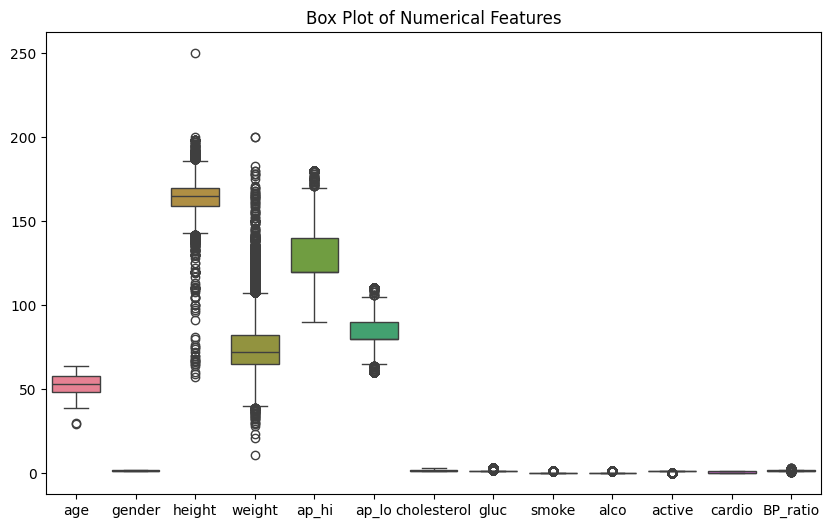

In [203]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['id']))
plt.title("Box Plot of Numerical Features")
plt.show()

In [204]:
# replace outliers in height and weight with mean with their respective means

# Calculate the mean '
mean_ap_lo = df['height'].mean()
mean_ap_hi = df['weight'].mean()

# Define the upper and lower bounds for outliers
ap_lo_upper_bound = df['height'].quantile(0.99)
ap_lo_lower_bound = df['height'].quantile(0.01)
ap_hi_upper_bound = df['weight'].quantile(0.99)
ap_hi_lower_bound = df['weight'].quantile(0.01)

# Replace outliers with the mean
df.loc[(df['height'] > ap_lo_upper_bound) | (df['height'] < ap_lo_lower_bound), 'height'] = mean_ap_lo

# Replace outliers with the mean
df.loc[(df['weight'] > ap_hi_upper_bound) | (df['weight'] < ap_hi_lower_bound), 'weight'] = mean_ap_hi
# values should remain as integers
df['height'] = df['height'].astype(int)
df['weight'] = df['weight'].astype(int)

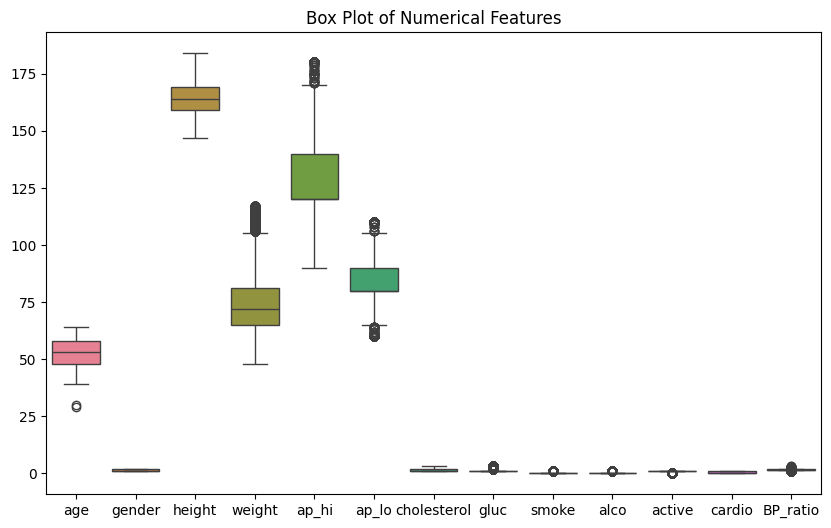

In [205]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['id']))
plt.title("Box Plot of Numerical Features")
plt.show()

In [206]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)  # BMI calculation

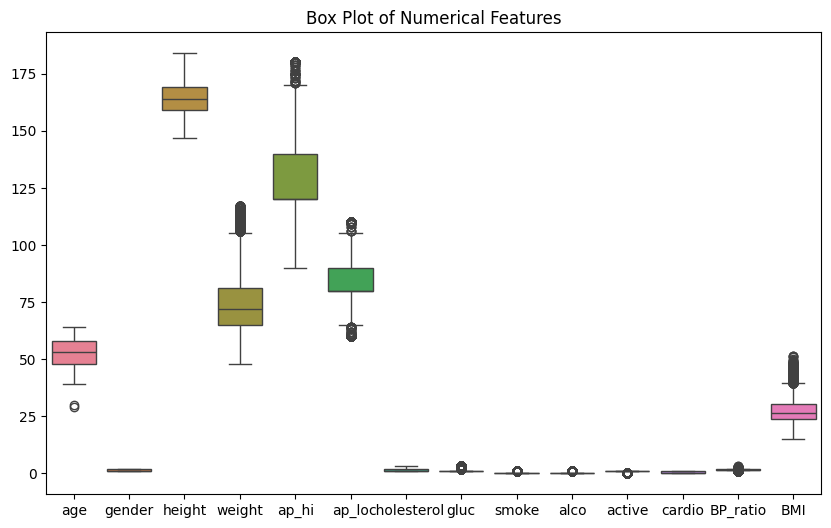

In [207]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['id']))
plt.title("Box Plot of Numerical Features")
plt.show()

In [208]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BP_ratio,BMI
0,83327,52,2,162,83,120,80,1,1,0,0,0,1,1.500000,31.626276
1,86196,47,1,158,64,120,80,1,1,0,0,1,0,1.500000,25.636917
2,59158,52,1,165,95,160,100,2,1,0,0,1,1,1.600000,34.894399
3,16399,55,1,164,83,150,100,1,1,0,0,1,1,1.500000,30.859607
4,29470,49,1,156,52,100,67,1,1,0,0,0,0,1.492537,21.367521


In [209]:
# cleaned dataset copy

cleaned_df = df.copy()


In [210]:
cleaned_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BP_ratio,BMI
0,83327,52,2,162,83,120,80,1,1,0,0,0,1,1.500000,31.626276
1,86196,47,1,158,64,120,80,1,1,0,0,1,0,1.500000,25.636917
2,59158,52,1,165,95,160,100,2,1,0,0,1,1,1.600000,34.894399
3,16399,55,1,164,83,150,100,1,1,0,0,1,1,1.500000,30.859607
4,29470,49,1,156,52,100,67,1,1,0,0,0,0,1.492537,21.367521


In [211]:

# Save the cleaned_df to a CSV file
cleaned_df.to_csv('cleaned_heart_disease_data.csv', index=False)


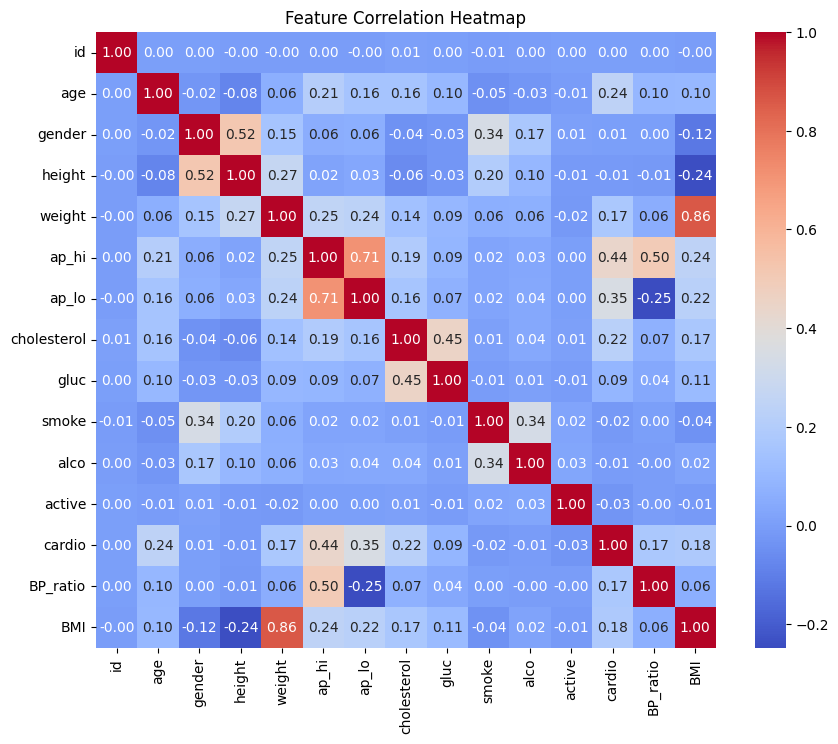

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = cleaned_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


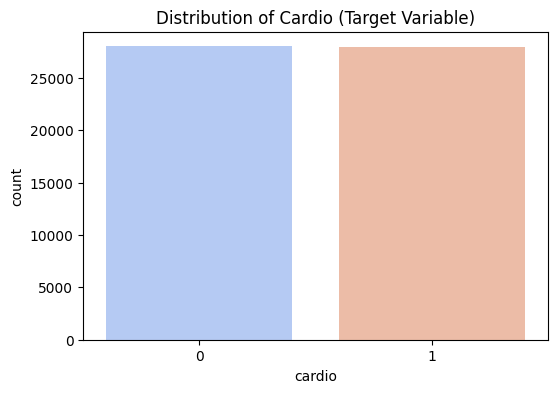

In [213]:
# Distribution of target variable (cardio)
plt.figure(figsize=(6, 4))
sns.countplot(x="cardio", data=cleaned_df, palette="coolwarm")
plt.title("Distribution of Cardio (Target Variable)")
plt.show()

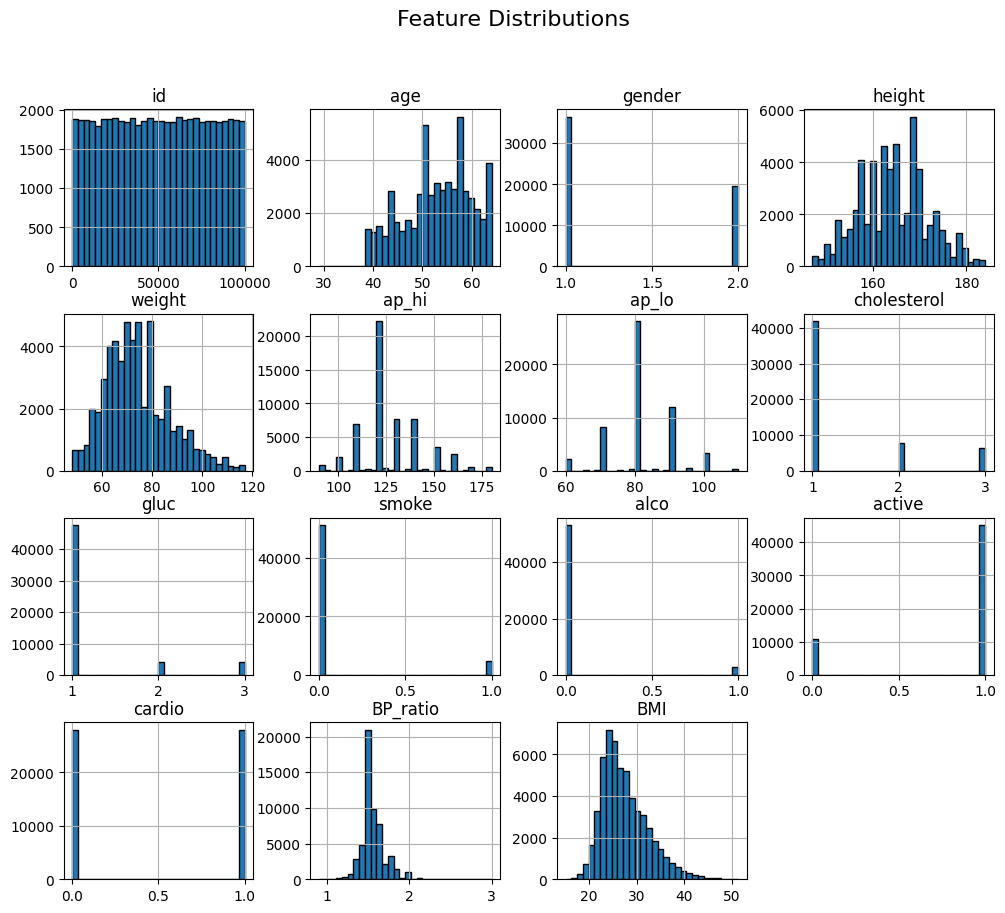

In [214]:
# Histograms for numerical features
cleaned_df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

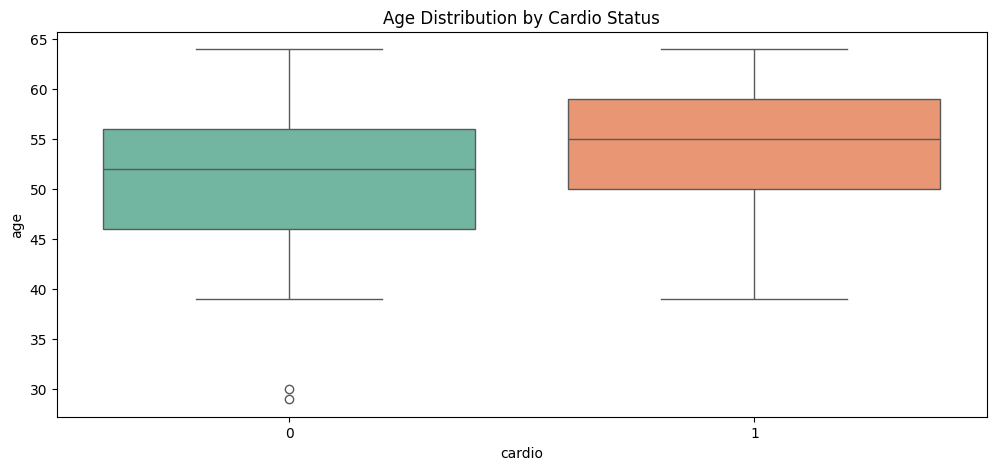

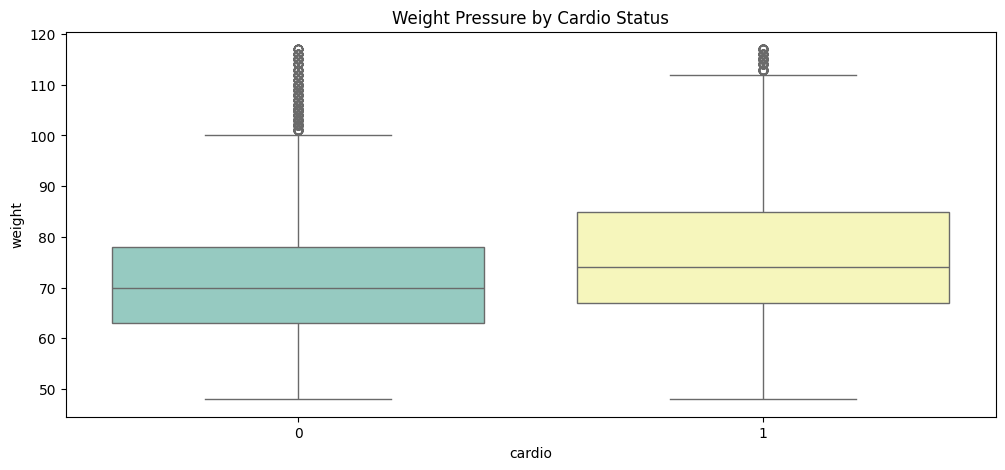

In [215]:
# Box plots for age and blood pressure by cardio status
plt.figure(figsize=(12, 5))
sns.boxplot(x="cardio", y="age", data=cleaned_df, palette="Set2")
plt.title("Age Distribution by Cardio Status")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="cardio", y="weight", data=cleaned_df, palette="Set3")
plt.title("Weight Pressure by Cardio Status")
plt.show()


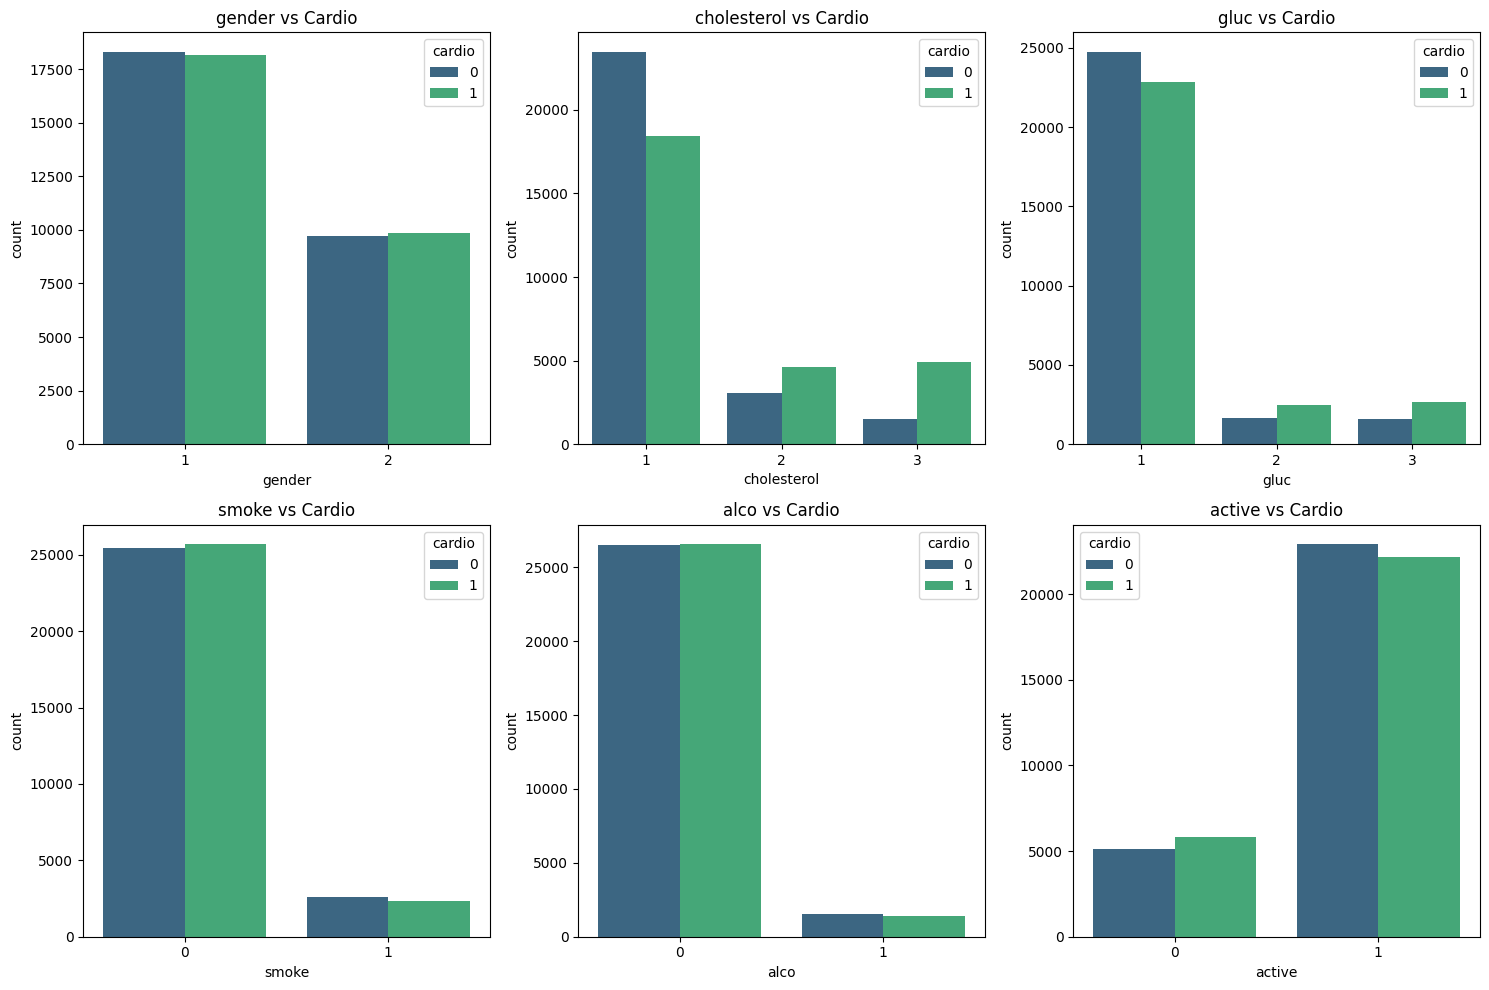

In [ ]:
# Countplot for categorical features
categorical_features = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue="cardio", data=df, ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"{feature} vs Cardio")

plt.tight_layout()
plt.show()

In [216]:
model_data = cleaned_df.copy()

In [217]:
model_data.drop(columns=['id','weight','height','ap_lo','ap_hi'], inplace=True)

In [218]:
model_data.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BP_ratio,BMI
0,52,2,1,1,0,0,0,1,1.500000,31.626276
1,47,1,1,1,0,0,1,0,1.500000,25.636917
2,52,1,2,1,0,0,1,1,1.600000,34.894399
3,55,1,1,1,0,0,1,1,1.500000,30.859607
4,49,1,1,1,0,0,0,0,1.492537,21.367521


## Training with Random Forest

In [244]:
#Uses a Random Forest classifier to rank the most important features.
#Recursively removes the least important ones.
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Exclude 'id' column from the features
X = model_data.drop(columns=['cardio'])
y = model_data['cardio']  # Target variable


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize model
rf = RandomForestClassifier(n_estimators=200,

                            random_state=42)
'''
# Apply Recursive function elimination
rfe = RFE(rf, n_features_to_select=5)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)
'''

'\n# Apply Recursive function elimination\nrfe = RFE(rf, n_features_to_select=5)  # Adjust the number of features as needed\nX_rfe = rfe.fit_transform(X, y)\n\n# Get selected features\nselected_features = X.columns[rfe.support_]\nprint("Selected Features:", selected_features)\n'

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate using F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

F1 Score: 0.6622702892816319
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      5603
           1       0.65      0.67      0.66      5597

    accuracy                           0.66     11200
   macro avg       0.66      0.66      0.66     11200
weighted avg       0.66      0.66      0.66     11200



In [221]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='f1')
print("Mean F1 Score:", cv_scores.mean())

Mean F1 Score: 0.69941684157098


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=300,
                                  max_depth=15,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate using F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

F1 Score: 0.721369429714392
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      5603
           1       0.75      0.69      0.72      5597

    accuracy                           0.73     11200
   macro avg       0.73      0.73      0.73     11200
weighted avg       0.73      0.73      0.73     11200



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Initialize model
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
# Evaluate the optimized model
y_pred_best = best_rf.predict(X_test)
f1_best = f1_score(y_test, y_pred_best)
print("Optimized F1 Score:", f1_best)

Optimized F1 Score: 0.7204100652376515


## Training with logistic Regression

In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score


# 1. Prepare Features and Target
X = model_data.drop(columns=['cardio'])  # Features (excluding target and ID)
y = model_data['cardio']  # Target variable

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [229]:
# 3. Scale the data using StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [230]:
# 4. Apply RFE for feature selection
logreg = LogisticRegression(random_state=42)
rfe = RFE(logreg, n_features_to_select=5)  # Select the top 5 features
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

In [231]:
# 5. Train the Logistic Regression model with the selected features
logreg.fit(X_train_rfe, y_train)

# 6. Make predictions
y_pred = logreg.predict(X_test_rfe)

In [232]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
# 7. Evaluate the model
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)

# Print the classification report for detailed evaluation (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred))

# 8. Display selected features by RFE
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


print("Accuracy of Logistic Regression:", accuracy)

# Print the classification report for detailed evaluation (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred))

# 8. Display selected features by RFE
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


F1 Score: 0.6400073542930685
Accuracy of Logistic Regression: 0.6503571428571429
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5639
           1       0.65      0.63      0.64      5561

    accuracy                           0.65     11200
   macro avg       0.65      0.65      0.65     11200
weighted avg       0.65      0.65      0.65     11200

Selected Features: Index(['age', 'cholesterol', 'active', 'BP_ratio', 'BMI'], dtype='object')
Accuracy of Logistic Regression: 0.6503571428571429
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5639
           1       0.65      0.63      0.64      5561

    accuracy                           0.65     11200
   macro avg       0.65      0.65      0.65     11200
weighted avg       0.65      0.65      0.65     11200

Selected Features: Index(['age', 'cholesterol', 'active', 'BP_ratio', 'BMI'], dtype='object')
